In [1]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#importing Libraries
from prophet import Prophet
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [55]:
#importing the dataset
df=pd.read_csv(r'/content/train_IxoE5JN.csv')

In [56]:
df.head()

,row_id,datetime,energy
0,1,2008-03-01 00:00:00,1259.985563
1,2,2008-03-01 01:00:00,1095.541500
2,3,2008-03-01 02:00:00,1056.247500
3,4,2008-03-01 03:00:00,1034.742000
4,5,2008-03-01 04:00:00,1026.334500


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94992 entries, 0 to 94991
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   row_id    94992 non-null  int64  
 1   datetime  94992 non-null  object 
 2   energy    93092 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.2+ MB


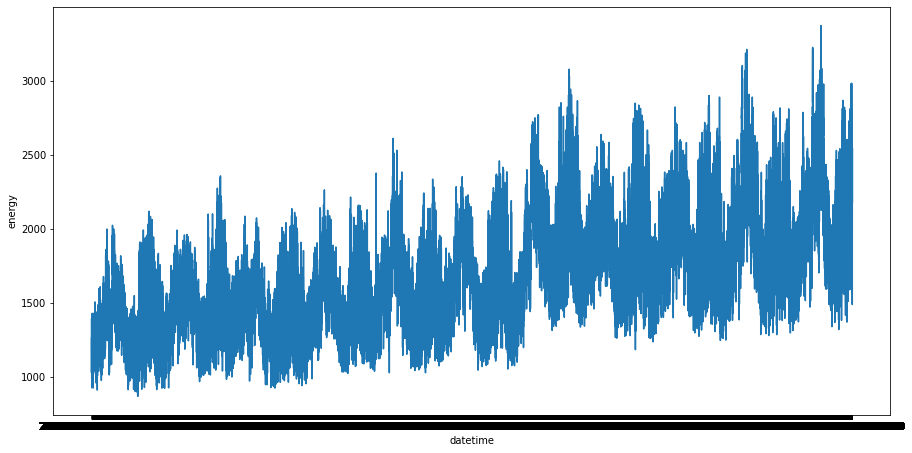

In [58]:
#plotting the line plot between date and energy
plt.figure(figsize=(15,7.5))
sns.lineplot(x='datetime',y='energy',data=df)


In [59]:
#converting the datetime column of the dtaframe to date time
df['datetime']=pd.to_datetime(df['datetime'],format='%Y-%m-%d %H:%M:%S')

In [60]:
#setting the datetime as the index of the dataframe
df.set_index('row_id',inplace=True)

In [61]:
df.head(25)

,datetime,energy
row_id,,
1,2008-03-01 00:00:00,1259.985563
2,2008-03-01 01:00:00,1095.541500
3,2008-03-01 02:00:00,1056.247500
4,2008-03-01 03:00:00,1034.742000
5,2008-03-01 04:00:00,1026.334500
6,2008-03-01 05:00:00,1033.768500
7,2008-03-01 06:00:00,1086.780000
8,2008-03-01 07:00:00,1211.742000
9,2008-03-01 08:00:00,1293.693000


In [62]:
#filling the missing values of the dataframe with interpolation from nearby data points
df['energy']=df['energy'].interpolate(option='time')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94992 entries, 1 to 94992
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  94992 non-null  datetime64[ns]
 1   energy    94992 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.2 MB


In [63]:
df.tail()

,datetime,energy
row_id,,
94988,2018-12-31 19:00:00,2528.4468
94989,2018-12-31 20:00:00,2461.8836
94990,2018-12-31 21:00:00,2365.9944
94991,2018-12-31 22:00:00,2342.9428
94992,2018-12-31 23:00:00,2180.2176


In [64]:
#changing the name of columns as y and ds
df.columns=['ds','y']   #to make it ready for prophet model 
df.head()

,ds,y
row_id,,
1,2008-03-01 00:00:00,1259.985563
2,2008-03-01 01:00:00,1095.541500
3,2008-03-01 02:00:00,1056.247500
4,2008-03-01 03:00:00,1034.742000
5,2008-03-01 04:00:00,1026.334500


In [65]:
#initialising the model
m=Prophet()

In [66]:
#fitting the model
m.fit(df)

DEBUG:cmdstanpy:input tempfile: /tmp/tmp94u471q0/14no4a_t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp94u471q0/yobzek0r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40299', 'data', 'file=/tmp/tmp94u471q0/14no4a_t.json', 'init=/tmp/tmp94u471q0/yobzek0r.json', 'output', 'file=/tmp/tmp94u471q0/prophet_modelk4yjwy3a/prophet_model-20221119143315.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:33:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:35:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [70]:
#making future dataframe for periods=3*365*24
future=m.make_future_dataframe(periods=26305,freq='h')

In [71]:
future.head()

,ds
0,2008-03-01 00:00:00
1,2008-03-01 01:00:00
2,2008-03-01 02:00:00
3,2008-03-01 03:00:00
4,2008-03-01 04:00:00


In [72]:
future.tail()

,ds
121292,2021-12-31 20:00:00
121293,2021-12-31 21:00:00
121294,2021-12-31 22:00:00
121295,2021-12-31 23:00:00
121296,2022-01-01 00:00:00


It is clear from above that the end row matches with the desired row number as given in the submission file

In [94]:
#predicted data on our future dataframe
forecast=m.predict(future)

In [74]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
121292,2021-12-31 20:00:00,2253.105164,-102.024512,5077.110805,-473.240910,4664.089026,317.947776,317.947776,317.947776,158.815088,...,58.220400,58.220400,58.220400,100.912288,100.912288,100.912288,0.0,0.0,0.0,2571.052940
121293,2021-12-31 21:00:00,2253.112266,-139.099119,5070.878019,-473.485120,4664.109676,302.204707,302.204707,302.204707,144.143482,...,57.373969,57.373969,57.373969,100.687257,100.687257,100.687257,0.0,0.0,0.0,2555.316973
121294,2021-12-31 22:00:00,2253.119368,-243.273927,4927.418793,-473.729329,4664.130326,249.315594,249.315594,249.315594,92.387048,...,56.466218,56.466218,56.466218,100.462328,100.462328,100.462328,0.0,0.0,0.0,2502.434962
121295,2021-12-31 23:00:00,2253.126470,-265.459615,4864.817638,-473.973538,4664.150976,167.083838,167.083838,167.083838,11.355100,...,55.491229,55.491229,55.491229,100.237509,100.237509,100.237509,0.0,0.0,0.0,2420.210308
121296,2022-01-01 00:00:00,2253.133572,-458.066481,4768.097208,-474.217747,4664.171626,74.105386,74.105386,74.105386,-80.349381,...,54.441956,54.441956,54.441956,100.012811,100.012811,100.012811,0.0,0.0,0.0,2327.238958


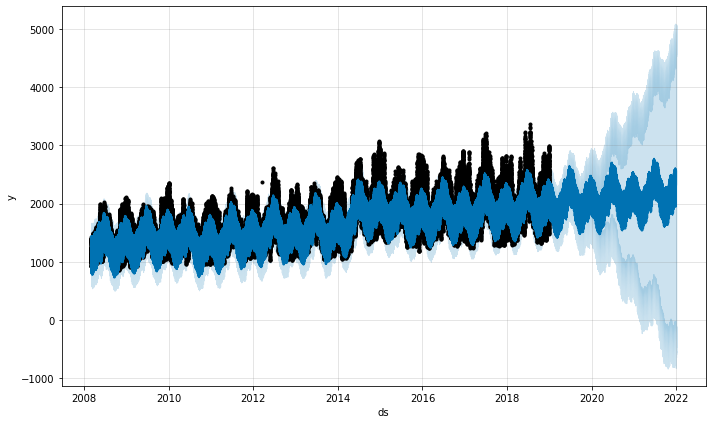

In [75]:
#plotting forecast of the data
m.plot(forecast);

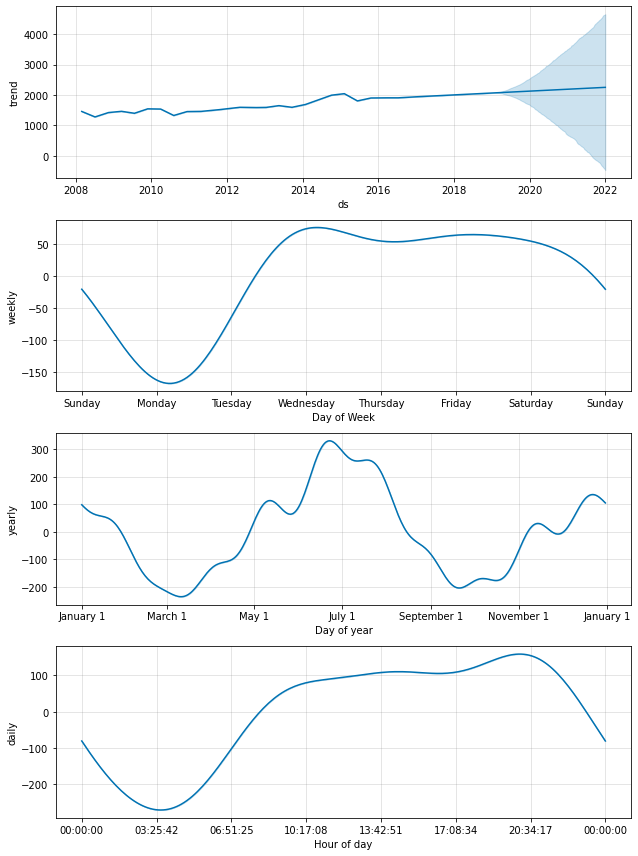

In [76]:
#plotting different components of forecast
m.plot_components(forecast);

In [107]:
final_df=forecast['yhat'][94993:]
final_df

94993     1948.178637
94994     1893.090388
94995     1865.038653
94996     1869.215885
94997     1909.066809
             ...     
121292    2571.052940
121293    2555.316973
121294    2502.434962
121295    2420.210308
121296    2327.238958
Name: yhat, Length: 26304, dtype: float64

In [108]:
final_df=pd.DataFrame(final_df)

In [112]:
final_df.rename(columns={'yhat':'energy'},inplace=True)

In [116]:
final_df.index.names=['row_id']

In [117]:
final_df

,energy
row_id,
94993,1948.178637
94994,1893.090388
94995,1865.038653
94996,1869.215885
94997,1909.066809
...,...
121292,2571.052940
121293,2555.316973
121294,2502.434962


In [118]:
final_df.to_csv('facebook_prophet1.csv')